<a href="https://colab.research.google.com/github/sesidhar-7/sesidhar/blob/main/AI%26ML_lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# importing all the necessary libraries
import pandas as pd
import numpy as np
#we need to read the data
data = pd.read_csv("/content/drive/MyDrive/train.csv")
#print top 5 rows
print(data.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [ ]:
# function to calculate the lower and upperbound
def detect_outliers(data,threshold):
  mean = np.mean(data)
  std =np.std(data)
  lb = max(mean - (threshold * std),min(data))
  ub = min(mean + (threshold * std),max(data))
  return lb,ub
df = data.copy()
lb,ub = detect_outliers(data["Fare"],4)
# removing the rows which are greater than upperbound
df.drop(df[df.Fare > ub].index, inplace=True)
# removing the rows which are less than lowerbound
df.drop(df[df.Fare < lb ].index, inplace=True)
print("lb: ",lb,"ub: ",ub)
df.sort_values(by="Fare",ascending=True,inplace=True)

lb:  0.0 ub:  230.86634574767106


In [ ]:
print(df)

     PassengerId  Survived  Pclass  \
271          272         1       3   
597          598         0       3   
302          303         0       3   
633          634         0       1   
277          278         0       2   
..           ...       ...     ...   
527          528         0       1   
716          717         1       1   
380          381         1       1   
557          558         0       1   
700          701         1       1   

                                                  Name     Sex   Age  SibSp  \
271                       Tornquist, Mr. William Henry    male  25.0      0   
597                                Johnson, Mr. Alfred    male  49.0      0   
302                    Johnson, Mr. William Cahoone Jr    male  19.0      0   
633                      Parr, Mr. William Henry Marsh    male   NaN      0   
277                        Parkes, Mr. Francis "Frank"    male   NaN      0   
..                                                 ...     ...   ... 

In [ ]:
lb,ub = detect_outliers(data["Age"],5)
# removing the rows which are greater than upperbound
df.drop(df[df.Age > ub].index, inplace=True)
# removing the rows which are less than lowerbound
df.drop(df[df.Age < lb].index, inplace=True)
print("lb: ",lb,"ub: ",ub)
df.sort_values(by="Age",ascending=False,inplace=True)

lb:  0.42 ub:  80.0


In [ ]:
print(df)

     PassengerId  Survived  Pclass  \
630          631         1       1   
851          852         0       3   
96            97         0       1   
493          494         0       1   
116          117         0       3   
..           ...       ...     ...   
306          307         1       1   
334          335         1       1   
31            32         1       1   
527          528         0       1   
557          558         0       1   

                                                  Name     Sex   Age  SibSp  \
630               Barkworth, Mr. Algernon Henry Wilson    male  80.0      0   
851                                Svensson, Mr. Johan    male  74.0      0   
96                           Goldschmidt, Mr. George B    male  71.0      0   
493                            Artagaveytia, Mr. Ramon    male  71.0      0   
116                               Connors, Mr. Patrick    male  70.5      0   
..                                                 ...     ...   ... 

In [ ]:
#printing the missing value percentage for every column
df.isnull().mean() * 100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            20.113636
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.954545
Embarked        0.227273
dtype: float64

In [ ]:
# get all the column names in our dataset
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
# As we can see cabin column has more than 30% of missing values, so we have to drop that column
df.drop(['Cabin'],inplace=True,axis=1)
# after removing the column cabin, printing the columns again. If you observe there is no Cabin in the output
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [ ]:
#printing the percentage of missing values in Age before handling
df['Age'].isnull().mean() * 100


20.113636363636363

In [ ]:
# Filling the missing values with the mean of respective column
df['Age']=df['Age'].fillna(df['Age'].mean())

In [ ]:
#printing the percentage of missing values in Age after handling
df['Age'].isnull().mean() * 100

0.0

In [ ]:
#printing the percentage of missing values in Embarked before handling
df['Embarked'].isnull().mean() * 100

0.22727272727272727

In [ ]:
# filling with filled with the most frequently occurring value.
df["Embarked"].fillna(df['Embarked'].mode()[0],inplace=True)
#printing the percentage of missing values in Embarked after handling
df['Embarked'].isnull().mean() * 100

0.0

In [ ]:
df.to_csv("/content/drive/MyDrive/notnull_titanic",index=False)

IsADirectoryError: [Errno 21] Is a directory: '/content/drive/MyDrive/notnull_titanic'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
#before starting with titanic data, consider example related to train_test_split
import numpy as np
from sklearn.model_selection import train_test_split
X, y = np.arange(10).reshape((5, 2)), range(5)
print(X)
print(list(y))

[[0 1]
 [2 3]
 [4 5]
 [6 7]
 [8 9]]
[0, 1, 2, 3, 4]


In [2]:
#The train_test_split function is a powerful tool in Scikit-learn's arsenal, primarily used to divide datasets into training and testing
#Basically, by setting the random_state , you guarantee that the (pseudo-) random number generator generates the same sequence of random
#random_state can be any number between 0 to 4294967295
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.33, random_state=41)
print(X_train)
print(y_train)
print(X_test)
print(y_test)

[[8 9]
 [6 7]
 [0 1]]
[4, 3, 0]
[[2 3]
 [4 5]]
[1, 2]


In [4]:
import pandas as pd
data=pd.read_csv("/content/titanic6.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 880 entries, 0 to 879
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  880 non-null    int64  
 1   Survived    880 non-null    float64
 2   Pclass      880 non-null    float64
 3   Age         880 non-null    float64
 4   SibSp       880 non-null    float64
 5   Parch       880 non-null    float64
 6   Fare        880 non-null    float64
 7   male        880 non-null    float64
 8   Q           880 non-null    float64
 9   S           880 non-null    float64
dtypes: float64(9), int64(1)
memory usage: 68.9 KB


In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.drop('Survived',axis=1),
data['Survived'], test_size=0.30,
random_state=101)
print(X_train)
print(y_train)
print(X_test)
print(y_test)

     Unnamed: 0  Pclass       Age  SibSp     Parch      Fare  male    Q    S
636         636     1.0  0.132948  0.000  0.000000  0.082573   1.0  0.0  0.0
779         779     1.0  0.367522  0.000  0.000000  0.034703   1.0  0.0  1.0
799         799     1.0  0.367522  0.000  0.000000  0.037175   1.0  1.0  0.0
266         266     0.5  0.396833  0.250  0.000000  0.323041   1.0  0.0  1.0
590         590     0.5  0.208344  0.000  0.000000  0.046149   0.0  0.0  1.0
..          ...     ...       ...    ...       ...       ...   ...  ...  ...
575         575     1.0  0.220910  0.000  0.000000  0.032945   0.0  0.0  1.0
838         838     1.0  0.367522  0.375  0.166667  0.111929   0.0  0.0  1.0
337         337     0.0  0.359135  0.125  0.000000  0.292715   1.0  0.0  1.0
523         523     1.0  0.258608  0.000  0.000000  0.037065   1.0  0.0  1.0
863         863     1.0  0.367522  0.000  0.000000  0.248306   1.0  0.0  1.0

[616 rows x 9 columns]
636    0.0
779    0.0
799    0.0
266    0.0
590    1

In [6]:
#remove unnamed:0
X_train.drop("Unnamed: 0", axis=1, inplace=True)
X_test.drop("Unnamed: 0", axis=1, inplace=True)
print(X_train)
print(X_test)
print(y_train)
print(y_test)

     Pclass       Age  SibSp     Parch      Fare  male    Q    S
636     1.0  0.132948  0.000  0.000000  0.082573   1.0  0.0  0.0
779     1.0  0.367522  0.000  0.000000  0.034703   1.0  0.0  1.0
799     1.0  0.367522  0.000  0.000000  0.037175   1.0  1.0  0.0
266     0.5  0.396833  0.250  0.000000  0.323041   1.0  0.0  1.0
590     0.5  0.208344  0.000  0.000000  0.046149   0.0  0.0  1.0
..      ...       ...    ...       ...       ...   ...  ...  ...
575     1.0  0.220910  0.000  0.000000  0.032945   0.0  0.0  1.0
838     1.0  0.367522  0.375  0.166667  0.111929   0.0  0.0  1.0
337     0.0  0.359135  0.125  0.000000  0.292715   1.0  0.0  1.0
523     1.0  0.258608  0.000  0.000000  0.037065   1.0  0.0  1.0
863     1.0  0.367522  0.000  0.000000  0.248306   1.0  0.0  1.0

[616 rows x 8 columns]
     Pclass       Age  SibSp     Parch      Fare  male    Q    S
408     1.0  0.308872  0.000  0.000000  0.033623   1.0  0.0  1.0
423     0.0  0.308872  0.125  0.333333  0.666081   0.0  0.0  1.0
1

In [7]:
from sklearn.linear_model import LogisticRegression
# Build the Model.
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression()

In [8]:
print("Predicting the model on the test set")
predicted = logmodel.predict(X_test)

Predicting the model on the test set


In [9]:
print("predicted result !")
predicted

predicted result !


array([0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 1., 0., 1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 1.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0.,
       1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       1., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1.,
       1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0.,
       0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 1., 1., 0., 1., 0.,
       0., 1., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0.,
       0., 0., 0., 1., 0.

[[155  18]
 [ 36  55]]


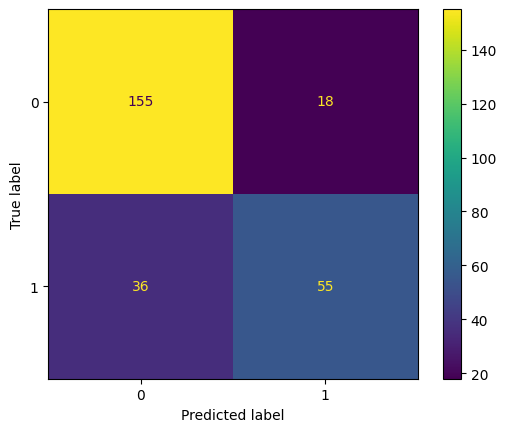

In [10]:
#confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from matplotlib import pyplot as plt
matrix=confusion_matrix(y_test, predicted)
print(matrix)
disp = ConfusionMatrixDisplay(confusion_matrix=matrix)
# Then just plot it:
disp.plot()
# And show it:
plt.show()

In [12]:
# with reference to Predicted Label (1-P(positive), 0-N(Negative)),
# now we will check whether predicted Label N is true/false with True label.
# if true label is 0, then predicted Label N, is True. This is represented as TN
# if true label is 1, then predicted Label N, is False. This is represented as FN
# TN FP
# FN TP
# Precision Score =TP/(TP+FP)=55/(55+18)
from sklearn.metrics import precision_score
print("Precision Score",precision_score(y_test,predicted))


Precision Score 0.7534246575342466


In [14]:
# Recall Score=TP/(TP+FN)=55/(55+36)
from sklearn.metrics import recall_score
print("recall score",recall_score(y_test,predicted))

recall score 0.6043956043956044


In [15]:
# F1 Score=2*precision*recall/(precision+recall)=2*0.75*0.604/(0.75+0.604)
from sklearn.metrics import f1_score
print("f1 score",f1_score(y_test,predicted))

f1 score 0.6707317073170731


In [16]:
# metrics are used to find accuracy or error
#Accuracy=(TP+TN)/(TP+TN+FP+FN)
from sklearn import metrics
# using metrics module for accuracy calculation
print("ACCURACY of Logistic Regression Model: ", metrics.accuracy_score(y_test, predicted))

ACCURACY of Logistic Regression Model:  0.7954545454545454


In [17]:
# importing random forest classifier from assemble module
from sklearn.ensemble import RandomForestClassifier
# creating a RF classifier
clf = RandomForestClassifier(n_estimators = 100)
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(X_train, y_train)
# performing predictions on the test dataset
y_pred = clf.predict(X_test)
#confusion matrix
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, y_pred))

[[149  24]
 [ 36  55]]


In [18]:
# Precision Score
from sklearn.metrics import precision_score
print("Precision Score",precision_score(y_test,y_pred))

Precision Score 0.6962025316455697


In [19]:
# Recall Score
from sklearn.metrics import recall_score
print("recall score",recall_score(y_test,y_pred))

recall score 0.6043956043956044


In [20]:
# F1 Score
from sklearn.metrics import f1_score
print("f1 score",f1_score(y_test,y_pred))

f1 score 0.6470588235294118


In [21]:
# Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.81      0.86      0.83       173
         1.0       0.70      0.60      0.65        91

    accuracy                           0.77       264
   macro avg       0.75      0.73      0.74       264
weighted avg       0.77      0.77      0.77       264



In [22]:
# metrics are used to find accuracy or error
from sklearn import metrics
# using metrics module for accuracy calculation
print("ACCURACY of Random Forest Classifier Model: ", metrics.accuracy_score(y_test, y_pred))

ACCURACY of Random Forest Classifier Model:  0.7727272727272727
